In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit

In [2]:
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
twitter = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/Tokyostation_3zi_2021.npy')
mobile_flatten = mobile.flatten()
twitter_flatten = twitter.flatten()

In [3]:
np.argmax(twitter_flatten)

459

In [4]:
twitter_flatten[459] = twitter_flatten[458]

In [5]:
#twitter_flatten = np.log10(twitter_flatten)
#mobile_flatten = np.log10(mobile_flatten)

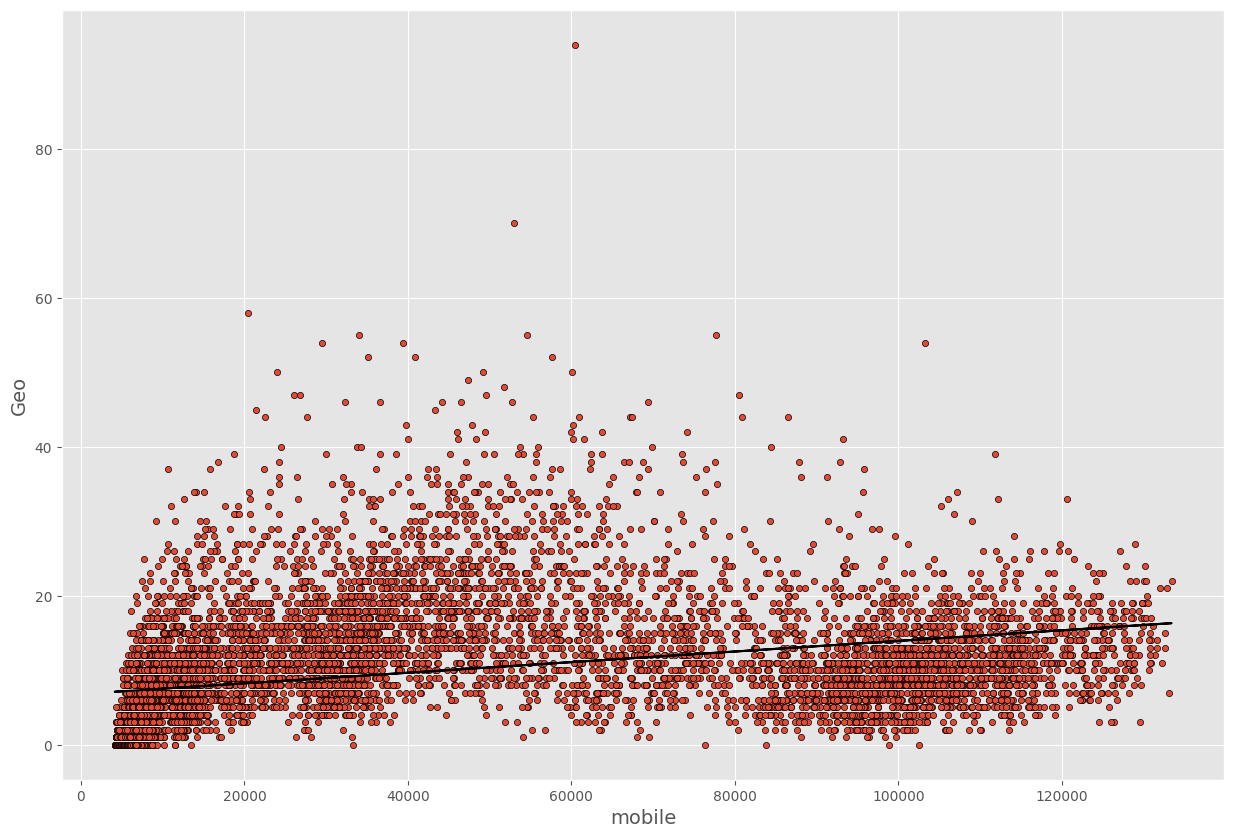

In [6]:
X = mobile_flatten.reshape(-1,1)
y =twitter_flatten.reshape(-1,1)
#f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

#mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
y2 = a * X + b
plt.plot(X, y2,color='black')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.scatter(X[:, 0], y, edgecolor="black", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
#plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

In [7]:
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
twitter = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/Tokyostation_3zi_2021.npy')

In [8]:
twitter_flatten[459] = twitter_flatten[458]

In [9]:
list_mobile_holiday = []
list_mobile_workday = []

list_twitter_holiday = []
list_twitter_workday = []

for i in range(0,365):
    if i%7 == 0:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 1:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 2:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 3:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 4:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 5:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 6:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())



In [10]:
list_mobile_holiday = np.array(list_mobile_holiday)
list_mobile_workday = np.array(list_mobile_workday)
list_twitter_holiday  = np.array(list_twitter_holiday)
list_twitter_workday  = np.array(list_twitter_workday)

In [11]:
list_mobile_holiday_flatten = list_mobile_holiday.flatten()
list_mobile_workday_flatten = list_mobile_workday.flatten()
list_twitter_holiday_flatten  = list_twitter_holiday.flatten()
list_twitter_workday_flatten = list_twitter_workday.flatten()

Text(0, 0.5, 'Geo')

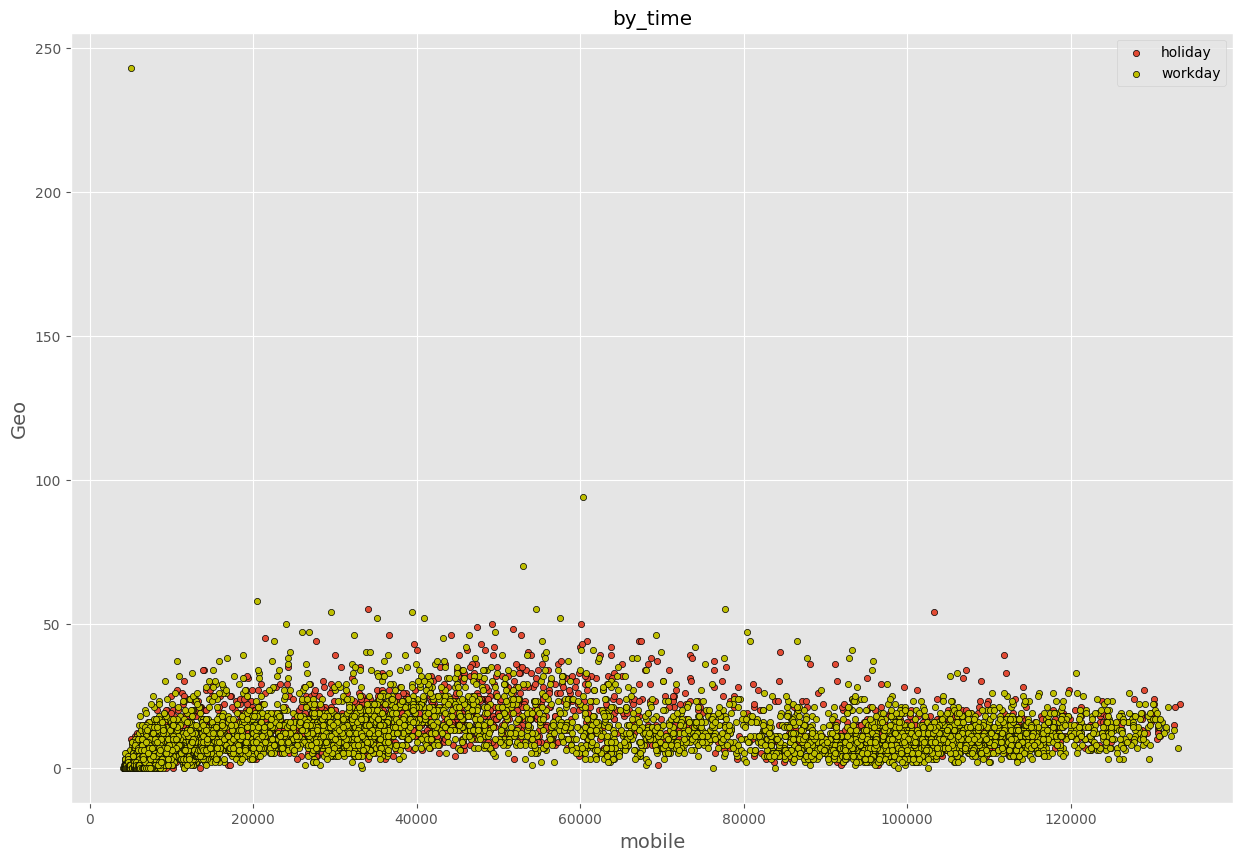

In [12]:
X = list_mobile_holiday_flatten.reshape(-1,1)
y = list_twitter_holiday_flatten.reshape(-1,1)
#f_test /= np.max(f_test)

#mi /= np.max(mi)

plt.figure(figsize=(15, 10))

plt.scatter(X[:, 0], y, edgecolor="black", s=20,label='holiday')


X = list_mobile_workday_flatten.reshape(-1,1)
y = list_twitter_workday_flatten.reshape(-1,1)

plt.scatter(X[:, 0], y, edgecolor="black", s=20,c='y',label='workday')


plt.legend()
plt.title('by_time')
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)


In [13]:
# x: input(人口)
def exp(x, k=1):
    rvalue = 0.0
    rvalue =  np.exp(k*x)
    return rvalue
def line(x,a=2):
    return a*x
def power(x, k=2):
    return (x**k)

In [15]:
x = mobile_flatten
y= twitter_flatten
popt_exp, pcov_exp = curve_fit(exp, x, y, p0=[0.001])
popt_line, pcov_line = curve_fit(line, x, y)
popt_power, pcov_power = curve_fit(power, x, y, p0=[ 1])

In [16]:
print(f'{popt_exp} {popt_line} {popt_power}')

[2.3648315e-05] [0.00015662] [0.22758211]


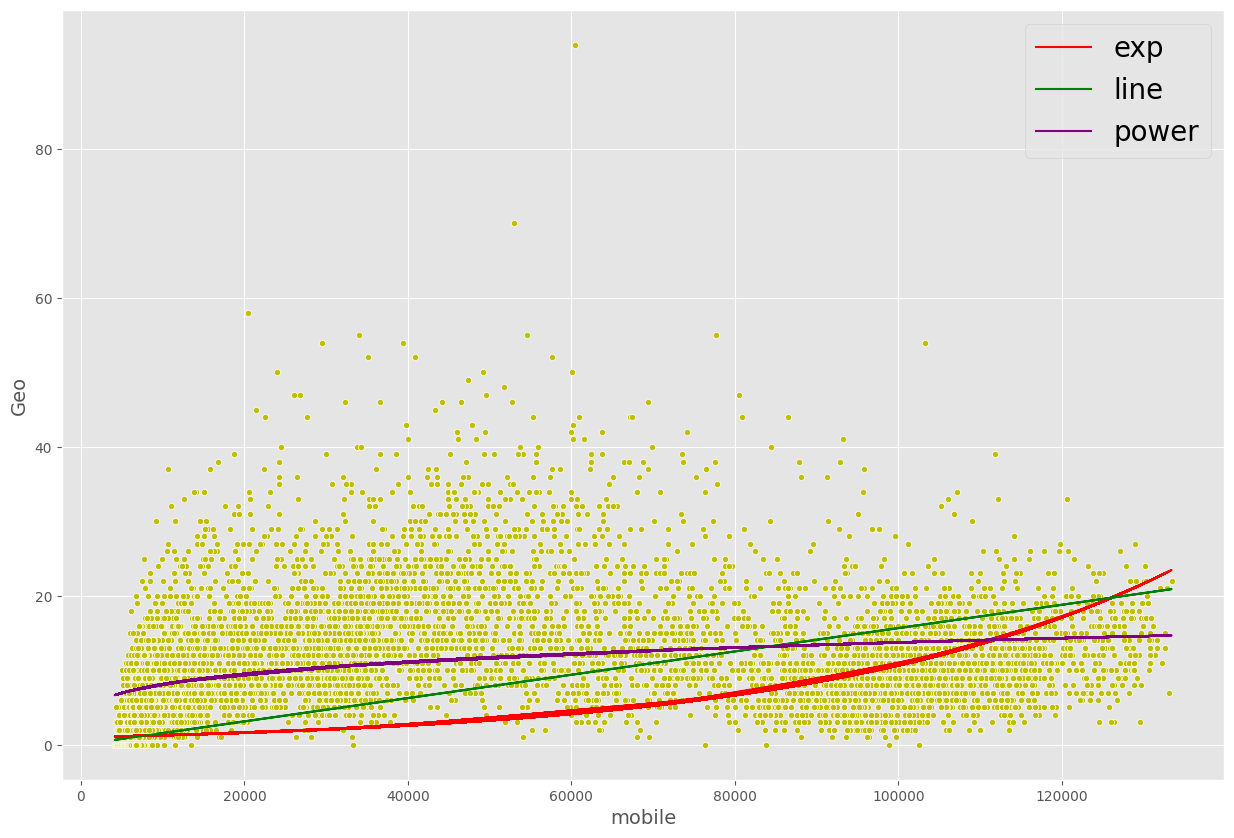

In [29]:
X = mobile_flatten.reshape(-1,1)
y =twitter_flatten.reshape(-1,1)
#f_test, _ = f_regression(X, y)
#f_test /= np.max(f_test)

#mi = mutual_info_regression(X, y)
#mi /= np.max(mi)

plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
fitting_exp = exp(X, *popt_exp)
fitting_line = line(X, *popt_line)
fitting_power = power(X, *popt_power)
plt.plot(X, fitting_exp,color='red', label='exp')
plt.plot(X, fitting_line,color='green', label='line')
plt.plot(X, fitting_power,color='purple', label='power')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.scatter(X[:, 0], y, color='y', edgecolor="white", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.legend(prop={"size": 20}, loc="upper right")
#plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()

/tmp/ipykernel_626039/2150535813.py:13: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(y)


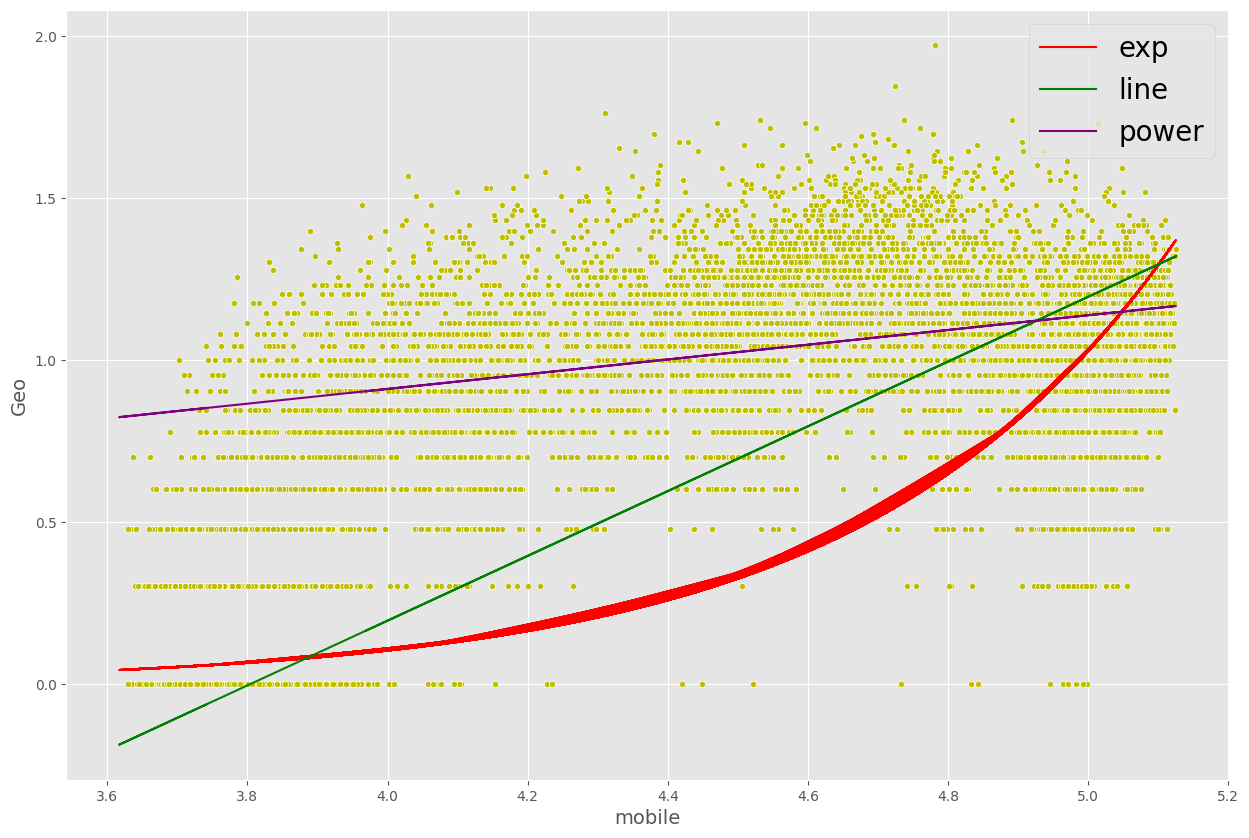

In [30]:
X = mobile_flatten.reshape(-1,1)
y =twitter_flatten.reshape(-1,1)


plt.figure(figsize=(15, 10))
a, b = np.polyfit(X[:,0], y, 1)
# フィッティング直線
fitting_exp = exp(X, *popt_exp)
fitting_line = line(X, *popt_line)
fitting_power = power(X, *popt_power)

X = np.log10(X)
y = np.log10(y)
fitting_exp = np.log10(fitting_exp)
fitting_line = np.log10(fitting_line)
fitting_power = np.log10(fitting_power)


plt.plot(X, fitting_exp,color='red', label='exp')
plt.plot(X, fitting_line,color='green', label='line')
plt.plot(X, fitting_power,color='purple', label='power')
#.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
plt.scatter(X[:, 0], y, color='y', edgecolor="white", s=20)
plt.xlabel("mobile", fontsize=14)
plt.ylabel("Geo", fontsize=14)
plt.legend(prop={"size": 20}, loc="upper right")
#plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[0], mi[0]), fontsize=16)
plt.show()